In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as pxs

<ul>
    <li type="I"><strong>Problem : Predicting Used Cars Prices Based Upon their Features : Based On India</strong></li>
    <ul><li>car_name</li></ul>
    <ul><li>brand</li></ul>
    <ul><li>model</li></ul>
    <ul><li>vehicle_age</li></ul>
    <ul><li>km_driven</li></ul>
    <ul><li>seller_type</li></ul>
    <ul><li>fuel_type</li></ul>
    <ul><li>transmission_type</li></ul>
    <ul><li>mileage</li></ul>
    <ul><li>engine</li></ul>
    <ul><li>max_power</li></ul>
    <ul><li>seats</li></ul>
    <ul><li>selling_price</li></ul>
</ul>


In [3]:
Car_df = pd.read_csv("cardekho_dataset.csv")
Car_df.drop(columns="Unnamed: 0",inplace=True)
Car_df.tail(10)

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
15401,Maruti Swift,Maruti,Swift,3,25000,Individual,Petrol,Automatic,22.00,1197,81.80,5,590000
15402,Honda Amaze,Honda,Amaze,6,28000,Dealer,Diesel,Manual,25.80,1498,98.60,5,525000
15403,Renault KWID,Renault,KWID,2,2700,Dealer,Petrol,Manual,25.17,799,53.30,5,395000
15404,Maruti Ertiga,Maruti,Ertiga,5,56829,Dealer,Diesel,Manual,20.77,1248,88.80,7,895000
15405,Hyundai Grand,Hyundai,Grand,5,9229,Dealer,Petrol,Manual,18.90,1197,82.00,5,545000
15406,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000
15410,Honda City,Honda,City,2,13000,Dealer,Petrol,Automatic,18.00,1497,117.60,5,1200000


In [4]:
#Checking Missing Values
Car_df.isnull().sum()

car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [9]:
Car_df.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [10]:
Car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.5+ MB


In [58]:
Car_df[["vehicle_age","km_driven","mileage","engine","max_power","seats","selling_price"]].corr()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
vehicle_age,1.000000,0.333891,-0.257394,0.098965,0.005208,0.030791,-0.241851
km_driven,0.333891,1.000000,-0.105239,0.192885,0.044421,0.192830,-0.080030
mileage,-0.257394,-0.105239,1.000000,-0.632987,-0.533128,-0.440280,-0.305549
engine,0.098965,0.192885,-0.632987,1.000000,0.807368,0.551236,0.585844
max_power,0.005208,0.044421,-0.533128,0.807368,1.000000,0.172257,0.750236
seats,0.030791,0.192830,-0.440280,0.551236,0.172257,1.000000,0.115033
selling_price,-0.241851,-0.080030,-0.305549,0.585844,0.750236,0.115033,1.000000


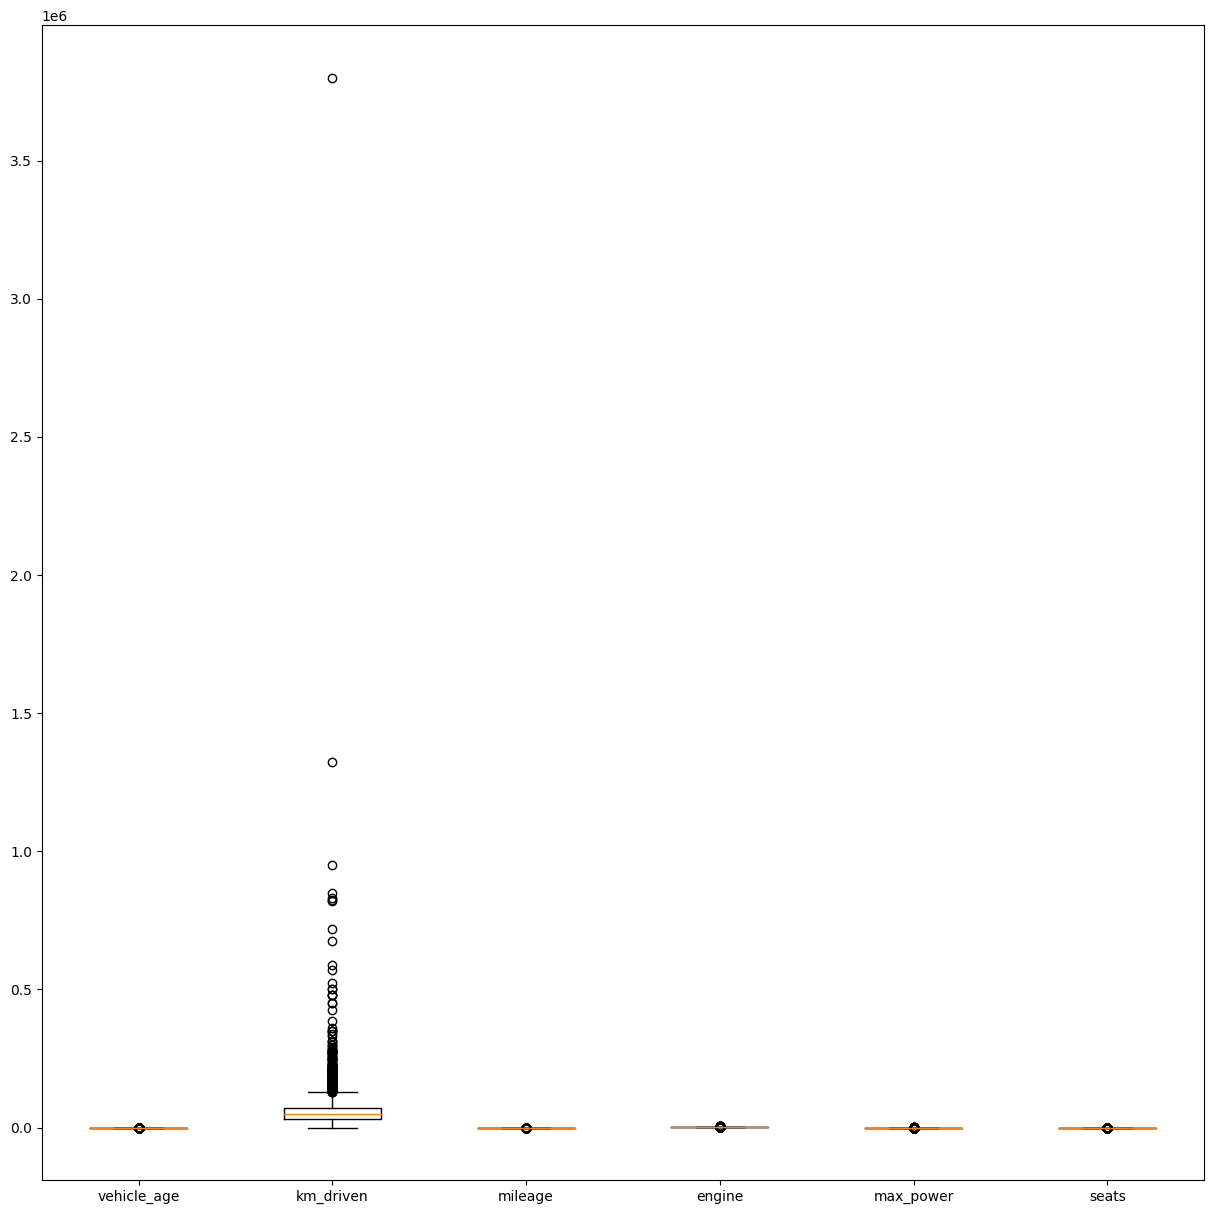

In [6]:
#Outlier Detection (Numerical Columns)
#boxplot
plt.figure(figsize=(15,15))
fig = plt.boxplot(Car_df[["vehicle_age","km_driven","mileage","engine","max_power","seats"]])
plt.xticks([1,2,3,4,5,6],["vehicle_age","km_driven","mileage","engine","max_power","seats"])
plt.show()

In [107]:
IQR = Car_df["mileage"].quantile(q=0.75)-Car_df["mileage"].quantile(q=0.25)
Upper = Car_df["mileage"].quantile(q=0.75)+1.5* IQR
lower = Car_df["mileage"].quantile(q=0.25)-1.5* IQR
print(Upper)
print(lower)

31.25
8.450000000000001


In [87]:
IQR = Car_df["km_driven"].quantile(q=0.75)-Car_df["km_driven"].quantile(q=0.25)
Upper = Car_df["km_driven"].quantile(q=0.75)+1.5* IQR
lower = Car_df["km_driven"].quantile(q=0.25)-1.5* IQR
print(Upper)
print(lower)

130000.0
-30000.0


In [103]:
Car_df[(Car_df["fuel_type"] == "Diesel") & (Car_df["mileage"] > 30)] #No such type

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price


In [91]:
Car_df[(Car_df["fuel_type"] == "CNG") & (Car_df["mileage"] > 30)] #Possible

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
169,Maruti Wagon R,Maruti,Wagon R,3,52000,Dealer,CNG,Manual,33.54,998,67.04,5,435000
182,Maruti Wagon R,Maruti,Wagon R,8,64000,Dealer,CNG,Manual,33.54,998,67.04,5,270000
317,Maruti Celerio,Maruti,Celerio,3,28000,Dealer,CNG,Manual,31.79,998,58.33,5,455000
422,Maruti Alto,Maruti,Alto,5,45000,Dealer,CNG,Manual,30.46,796,47.30,5,350000
480,Maruti Alto,Maruti,Alto,5,42000,Dealer,CNG,Manual,33.44,796,40.30,4,260000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14932,Maruti Celerio,Maruti,Celerio,2,50000,Individual,CNG,Manual,31.79,998,58.33,5,390000
15016,Maruti Alto,Maruti,Alto,5,78950,Dealer,CNG,Manual,30.46,796,47.30,5,299000
15226,Maruti Wagon R,Maruti,Wagon R,5,74844,Dealer,CNG,Manual,33.54,998,67.04,5,390000
15317,Maruti Wagon R,Maruti,Wagon R,7,83521,Dealer,CNG,Manual,32.52,998,58.33,5,335000


In [90]:
Car_df[(Car_df["fuel_type"] == "Petrol") & (Car_df["mileage"] > 30)] #No Such Type

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price


In [98]:
Car_df["fuel_type"]

0        Petrol
1        Petrol
2        Petrol
3        Petrol
4        Diesel
          ...  
15406    Petrol
15407    Petrol
15408    Diesel
15409    Diesel
15410    Petrol
Name: fuel_type, Length: 15411, dtype: object

In [104]:
Outliers = []
for i in Car_df["km_driven"].values.tolist():
    if(i<lower or i>Upper):
        Outliers.append(i)
    else:
        pass

In [128]:
#removing the Highly Extreme Value 
d = Car_df[Car_df["km_driven"]==3800000]
Car_df = Car_df.drop(Car_df.index[15409])

In [131]:
Car_df

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15405,Hyundai Grand,Hyundai,Grand,5,9229,Dealer,Petrol,Manual,18.90,1197,82.00,5,545000
15406,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000


In [132]:
Car_df.to_csv("Validation.csv",index=False)


<p><h1><b>Final Report: Data Validation</b></h1></p>
<li><b>Info:</b> The dataset contains 15410 rows and 13 columns.
Most columns are of type object, int64, or float64.No Missing Values In Any Of The Columns
</li>
<li><b>Missing Values :</b> No Such Missing Values Found.Original Data Retained</li>
<li><b>Outliers :</b>A huge number of outliers were detected. However, many values appear realistic based on real-world expectations.
In the feature "km_driven", values between 800,000 to 1,500,000 km are flagged as outliers statistically, but they may be realistic for certain use cases.However, one extreme value - 3,800,000 km was clearly unrealistic and has been removed from the dataset.
</li>
<li>No <b>DataType Fault</b>. Dataset verified and retained</li>
<li><b>Duplicates</b> Found but they appear possible for real-world use cases.Verified and retained</li>

